In [26]:
import pandas as pd
from collections import Counter
import numpy as np
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [75]:
train = pd.read_csv("train_V2.csv")
train = train.drop(["Unnamed: 0", "Tax_assess_Year"], axis = 1)

In [76]:
train.shape

(90275, 60)

Somehow a few variables change back to numeric after reading csv using pandas. 

In [77]:
toobject = ["FIPS", "County", "Raw_census", "Zipcode", "Land_Type"]

for col in toobject:
    train[col] = train[col].astype("object")

In [78]:
train["tran_month"] = [datetime.strptime(x, "%Y-%m-%d").month for x in train.tran_date]

train["tran_day"] = [datetime.strptime(x, "%Y-%m-%d").day for x in train.tran_date]

In [86]:
train.to_csv("train_V3.csv")

## Response variable

In [79]:
y = train.logerror

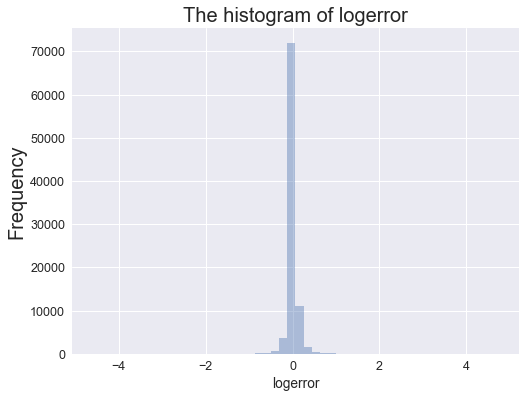

In [80]:
plt.figure(figsize=(8, 6))
ax = sns.distplot(y, kde = False)
ax.set_title("The histogram of logerror",fontsize = 20)
ax.set_ylabel("Frequency",fontsize = 20)

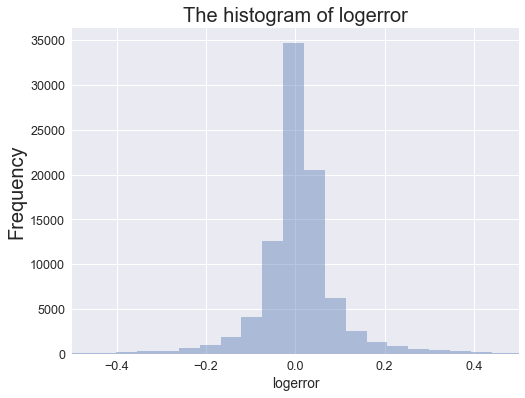

In [81]:
plt.figure(figsize=(8, 6))
ax = sns.distplot(y, kde = False, bins = 200)
ax.set(xlim = (-0.5, 0.5))
ax.set_title("The histogram of logerror",fontsize = 20)
ax.set_ylabel("Frequency",fontsize = 20)

## Correlation between variables

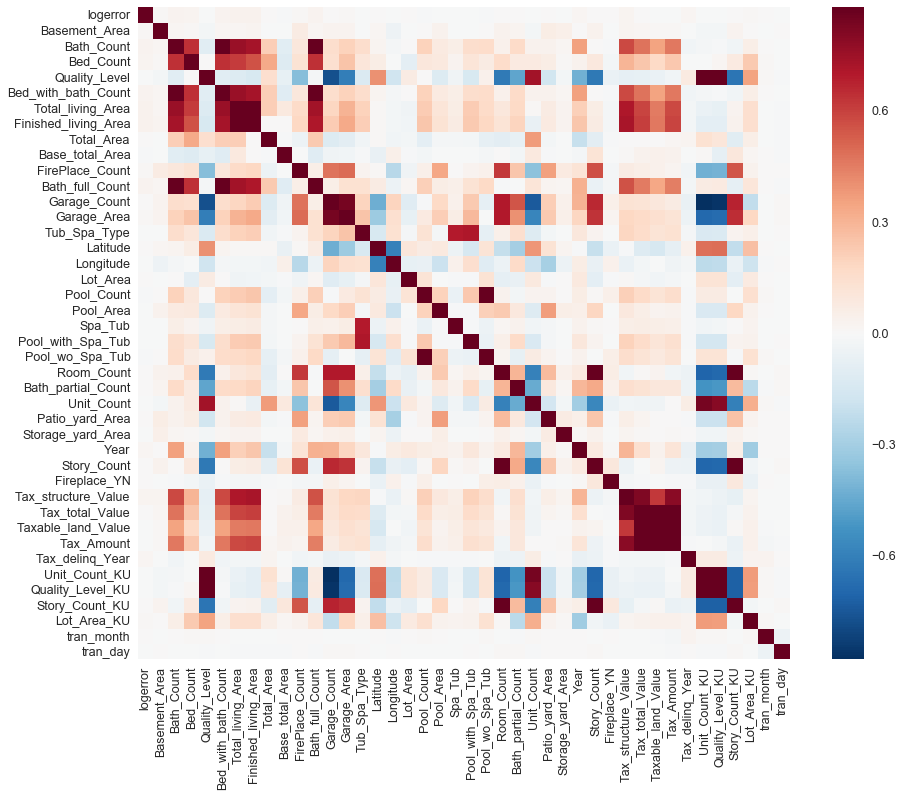

In [82]:
#correlation matrix
corrmat = train.iloc[:,1:].corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

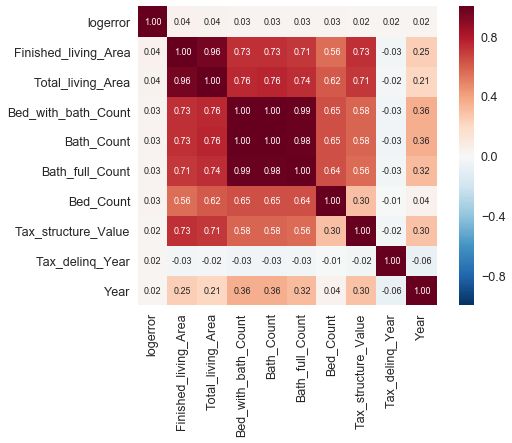

In [83]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'logerror')['logerror'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, annot_kws={'size': 9},square=True, fmt='.2f', 
                 yticklabels=cols.values, xticklabels=cols.values)

## Random forest Regressor

In [84]:
X = train.drop(["Parcel_ID", "logerror","tran_date"], axis = 1)

In [85]:
X.shape

(90275, 59)

In [ ]:
t0 = time.time()
rfr_model = RFR()
cross_validation = StratifiedKFold(n_splits = 10, shuffle = False, random_state = None)
parameter_grid = {"n_estimators":np.arange(10, 200, 10), "max_depth": range(5,20)}

grid_search = GridSearchCV(rfr_model, param_grid=parameter_grid, cv=cross_validation, n_jobs=4)
grid_search.fit(X, y)
print "The best score is:", grid_search.best_score_
print "The best params are:", grid_search.best_params_
print "The time used", time.time() - t0

Some thoughts:

1. cluster by kmeans. so we can get a label of geographical info for each sample. In test data, we first, subset the geographical variables, and then use knn to find the labels for each test sample.

2. Random forest may be able to find useful features even though there are a lot of categories in one feature. Get the feature_importances_, and see whether some geographical info is included.

3. After the clusters are fixed, and features are cleaned. Perform linear regression, ridge, lasso, random forest regressor, Xgboost regressor, adaboost regressor?

4. predict for test. Test data need to be processed as train data.